In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [100]:
# Define some initial params
# Dimensionality
Dn = 20

# Mutation probability
M = 0.1

# Population size
NP = 200

# No. of generations
G = 100

In [101]:
r = np.random.random((Dn,))
def f(x):
    return ((x + r)**2).sum()

print r

[ 0.96834597  0.22766246  0.23285604  0.47358026  0.88744748  0.27682911
  0.36507164  0.72697461  0.19014316  0.74817271  0.82108912  0.07230067
  0.78665122  0.36564014  0.78679063  0.00716283  0.18768055  0.17904817
  0.19020782  0.07640186]


In [102]:
# Generate population
pop = []

for ix in range(NP):
    # generate a random vector
    vec = np.random.uniform(-10, 10, (Dn,))
    
    # Add to population
    pop.append(vec)

print len(pop)

200


In [103]:
def crossover(parent_1, parent_2):
    child_1 = np.zeros(parent_1.shape)
    child_2 = np.zeros(parent_2.shape)
    
    dim = int(parent_1.shape[0] / 2.0)
    
    child_1[:dim] = parent_1[:dim]
    child_1[dim:] = parent_2[dim:]
    
    child_2[:dim] = parent_2[:dim]
    child_2[dim:] = parent_1[dim:]
    
    return child_1, child_2

def mutate(x):
    for ix in range(x.shape[0]):
        # Generate a random number for probability
        R = np.random.random()
        
        if R < M:
            # Mutate random index 
            x[ix] = np.random.uniform(-5, 5)
        else:
            pass
    return x

In [104]:
loss = []

# Main Genetic Algo loop
for gx in range(G):
    pop = sorted(pop, key=lambda z: f(z))
    print "Generation: {0} | Best Value: {1}".format(gx, f(pop[0]))
    loss.append(f(pop[0]))
    
    # create a temp population
    temp = []
    
    while not len(temp) == NP:
        # Select 2 parents from good section of population
        p1, p2 = random.sample(pop[:int(NP/4.0)], 2)
        
        # Apply crossover
        c1, c2 = crossover(p1, p2)
        
        # mutate
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        temp.append(c1)
        temp.append(c2)
    
    # create a combined population
    comb = temp + pop
    
    # survival of the fittest
    pop = sorted(comb, key=lambda z: f(z))[:NP]

Generation: 0 | Best Value: 312.376889495
Generation: 1 | Best Value: 227.807555923
Generation: 2 | Best Value: 103.670801867
Generation: 3 | Best Value: 103.365859435
Generation: 4 | Best Value: 66.6952676215
Generation: 5 | Best Value: 55.4059722666
Generation: 6 | Best Value: 42.4403056061
Generation: 7 | Best Value: 35.4411475284
Generation: 8 | Best Value: 35.0643248368
Generation: 9 | Best Value: 27.6353103901
Generation: 10 | Best Value: 26.4838412438
Generation: 11 | Best Value: 15.8822252023
Generation: 12 | Best Value: 14.1824985098
Generation: 13 | Best Value: 12.5689021852
Generation: 14 | Best Value: 12.5689021852
Generation: 15 | Best Value: 11.7148746514
Generation: 16 | Best Value: 11.4268915395
Generation: 17 | Best Value: 10.3676189462
Generation: 18 | Best Value: 8.1200849932
Generation: 19 | Best Value: 8.1200849932
Generation: 20 | Best Value: 7.74793578923
Generation: 21 | Best Value: 6.57442828161
Generation: 22 | Best Value: 6.57442828161
Generation: 23 | Best V

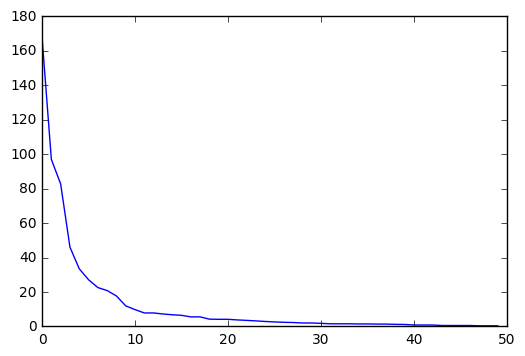

In [94]:
plt.plot(loss)